In [5]:
!pip install tensorflow

In [6]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
## devide the dataset into independent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [12]:
# feature engineering

In [13]:
geography = pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [14]:
X.drop(['Geography','Gender'], axis = 1, inplace = True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [15]:
X = pd.concat([X,geography,gender], axis = 1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [17]:
, StandardScaler
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [20]:
X_train.shape

(8000, 11)

In [21]:
## lets creat ann

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU, ReLU
from tensorflow.keras.layers import Dropout


In [23]:
#lets initialz3e the ann
classifier = Sequential()

In [24]:
##adding input layer
classifier.add(Dense(units  = 11, activation = 'relu'))

In [25]:
## adding the first hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))

In [26]:
## adding the second hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))

In [27]:
## adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [28]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])

In [29]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [30]:
# early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [31]:
model_history = classifier.fit(X_train,y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 13s 10ms/step - loss: 0.4537 - accuracy: 0.7987 - val_loss: 0.4345 - val_accuracy: 0.8073
Epoch 2/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.4170 - accuracy: 0.8220 - val_loss: 0.4197 - val_accuracy: 0.8183
Epoch 3/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.4015 - accuracy: 0.8259 - val_loss: 0.4043 - val_accuracy: 0.8262
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3843 - accuracy: 0.8403 - val_loss: 0.3918 - val_accuracy: 0.8296
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3682 - accuracy: 0.8455 - val_loss: 0.3789 - val_accuracy: 0.8429
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3584 - accuracy: 0.8535 - val_loss: 0.3753 - val_accuracy: 0.8406
Epoch 7/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3522 - accuracy: 0.8569 - val_loss: 0.3715 - val_accurac

In [32]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

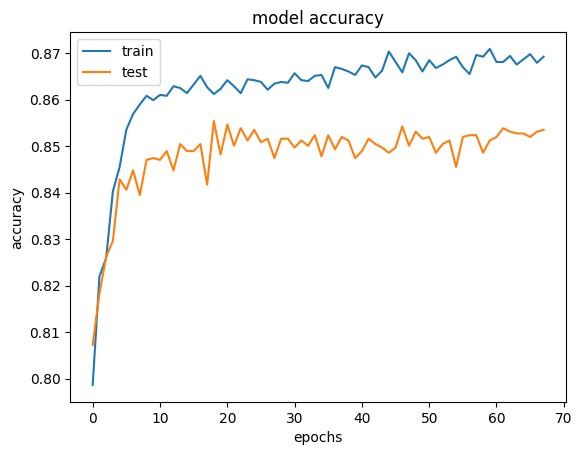

In [33]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc = 'upper left')
plt.show()


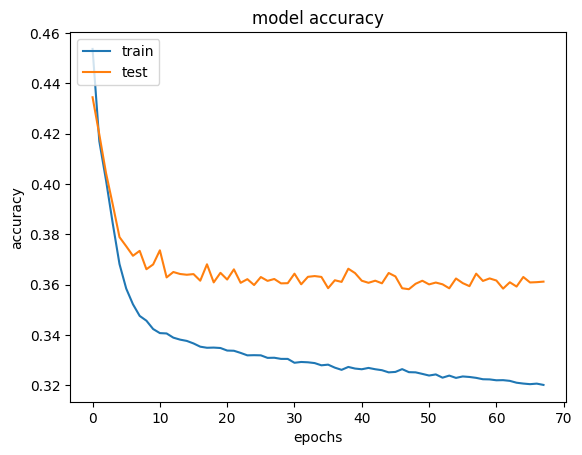

In [34]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc = 'upper left')
plt.show()


In [35]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1530,   65],
       [ 216,  189]])

In [37]:
from  sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [38]:
score

0.8595

In [40]:
classifier.get_weights()

[array([[-0.01487449, -0.02030586, -0.25315508,  0.00966283, -0.38371402,
         -0.13110986, -0.3703602 ,  0.14555748,  0.20258242,  0.44776312,
         -0.17706288],
        [-0.59030527,  0.11462652,  0.18649288,  0.10609871, -0.61768407,
          0.67629164,  0.6387715 ,  0.05377666, -0.84739226, -0.40127602,
         -1.101988  ],
        [ 0.07647683,  0.05437758,  0.4220695 ,  0.03333898,  0.1672898 ,
          0.25181952,  0.43925974,  0.09789449, -0.0015509 , -0.22723857,
         -0.35627684],
        [-0.20897697,  0.15148206, -0.2653057 , -0.47904542,  0.3398621 ,
         -0.47539026, -0.55851245, -0.32585114,  0.19010685, -0.32306397,
         -0.16829088],
        [ 0.3160699 ,  1.305026  ,  0.30356577, -1.0945203 ,  0.14303018,
          0.20813249, -0.20276898, -0.31235376, -0.17680077, -0.09743159,
          0.2891642 ],
        [-0.10984631, -0.08493549, -0.32965586, -0.06553864, -0.35051227,
          0.02560573,  0.29166284,  0.38270843,  0.01515447,  0.1654360